In [29]:
from subpred.util import load_df
import pandas as pd


In [45]:
# TODO Different ways to filter for passive transporters, different definitions
# TODO What to do about multiple substrates? Create stats on them
# TODO Plots: Dim reduction, Hclust, Kmeans
# TODO stats on 2.B, 2.C, 2.D
# TODO possible to make bacteria-only dataset?
# TODO sequence clustering
# TODO what to do about complexes?

When clustering the entire dataset of *E. coli* transporters in the previous notebook, we discovered that clusters form based on transport mechanism or protein family, not on substrates, which is what we wanted. The idea now is to only look at one type of transmembrane transporter, to find out if we can divide that set into substrates. We already had the suspicion in Manuscript 1 that the *A. thaliana* model worked to well because virtually all of the transporters in our dataset were secondary active. 

In this notebook, we will try creating datasets that only contain secondary active transporters, which typically transport small hydrophilic molecules across membranes. This excludes channels (passive transporters), binding proteins from transport complexes such as ABC transporters, primary active transporters, and others. We will look at those in other notebooks.

Secondary active transporters are gradient-driven transporters, typically with alpha-helical structures. The biggest category should be the Porters, in the form of Uniporters, Symporters and Antiporters. The latter two come with the challenge that they fall into two or more substrate classes. We should create different categories for the individual combinations, and see if they make good substrate classes. The mechanism usually works by a conformational change in the protein, through the presence of a substrate.

We will also explore four different ways of creating the passive transporter dataset: TCDB, Gene Ontology, Keywords and Interpro domains. The respective datasets will be compared in terms of size and overlap. TCDB might have the most biologically accurate data, but is not available for most organisms. *E. coli* is a rare example where most of the transporters have an entry. 

## Protein dataset

Loading the Uniprot data for all organisms:

In [31]:
df_uniprot = load_df("uniprot")
df_uniprot

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,True,1,MRWQEMGYIFYPRKLR,9606
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,True,1,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606
A0JNW5,BLTP3B KIAA0701 SHIP164 UHRF1BP1L,Bridge-like lipid transfer protein family memb...,True,1,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606
A0JP26,POTEB3,POTE ankyrin domain family member B3,True,1,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606
A0PK11,CLRN2,Clarin-2,True,1,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
...,...,...,...,...,...,...
X5L4R4,NOD-2,Nucleotide-binding oligomerization domain-cont...,False,2,MSPGCYKGWPFNCHLSHEEDKRRNETLLQEAETSNLQITASFVSGL...,586796
X5MBL2,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,KVLYDRAFNSSDDQSALVYLLLKEKDKWADRIFIEHKYYLNGYWLD...,3352
X5MFI4,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,MDEDVLCKGPLHGGSARSLKGSLKRLKRIMESLNDGLIFMGGAVSA...,3352


Filtering for *E coli K12*, since that strain has the highest number of functional annotations.

In [85]:
df_uniprot_ecoli = df_uniprot[df_uniprot.organism_id == 83333].drop("organism_id", axis=1)
df_uniprot_ecoli

,gene_names,protein_names,reviewed,protein_existence,sequence
Uniprot,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...
...,...,...,...,...,...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...
P33668,ybbC b0498 JW0487,Uncharacterized protein YbbC,True,2,MKYSSIFSMLSFFILFACNETAVYGSDENIIFMRYVEKLHLDKYSV...


What is the distribution of evidence codes among Swissprot and TrEMBL?

In [33]:
df_uniprot_ecoli.groupby(["reviewed", "protein_existence"]).size().reset_index().rename(columns={0:'count'})

,reviewed,protein_existence,count
0,False,1,1
1,False,2,1
2,True,1,3118
3,True,2,164


This organism seems to be researched very well. TrEMBL only adds two additional samples to the dataset. Which ones are those?

In [34]:
df_uniprot_ecoli[~df_uniprot_ecoli.reviewed]

,gene_names,protein_names,reviewed,protein_existence,sequence
Uniprot,,,,,
A0A7H2C7B0,speFL ECK4660 b4803,Leader peptide SpeFL (Arrest peptide SpeFL),False,2,MENNSRTMPHIRRTTHIMKFAHRNSFDFHFFNAR
A0A0A6YVN8,D-tagatose 3-epimerase,D-tagatose 3-epimerase,False,1,MNKVGMFYTYWSTEWMVDFPATAKRIAGLGFDLMEISLGEFHNLSD...


A metal ion binding protein with otherwise unknown function or location, and an expression factor. Nothing related to transport, we can remove them.

In [35]:
df_uniprot_ecoli = df_uniprot_ecoli[df_uniprot_ecoli.reviewed].drop(["reviewed"], axis=1)
df_uniprot_ecoli

,gene_names,protein_names,protein_existence,sequence
Uniprot,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...
...,...,...,...,...
P77564,ydhW b1672 JW1662,Uncharacterized protein YdhW,2,MGKMNHQDELPLAKVSEVDEAKRQWLQGMRHPVDTVTEPEPAEILA...
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...


It could also be interesting to have a bacteria-only dataset, and compare that to *E. coli*. Is there a tsv file that maps organism id to kingdom?

## Annotations for filtering out passive transporters

Different databases have different definitions of transporter classes, and different annotations.

#### TCDB:

The *TCDB class 2* represents the *Electrochemical Potential-driven Transporters*. These are split into subclasses 2.A (Porters) and 2.B, 2.C and 2.D . Class 2.A seems to correspond to the typical definition of secondary active transporters, so we should look at the remaining three subclasses.

#### Gene Ontology:

The term *secondary active transmembrane transporter activity* (GO:0015291) is a molecular function annotation. The definition is:

*Enables the transfer of a solute from one side of a membrane to the other, up its concentration gradient. The transporter binds the solute and undergoes a series of conformational changes. Transport works equally well in either direction and is driven by a chemiosmotic source of energy, not direct ATP coupling. Secondary active transporters include symporters and antiporters.*

The GO entry cites the TCDB paper as its source, so it seems to use the same definitions.

Child terms include: symporter activity, uniporter activity, antiporter activity.

We should look into electronically inferred annotations (IEA). How would they impact the number of secondary active transport annotations in our dataset?

Qualifiers for the annotations should be filtered by "enables", which means that the protein is directly responsible for the function.

#### Keywords:

- Symport (KW-0769): Protein involved in the transport of solutes across a biological membrane in one direction, which depends on the transport of another solute in the same direction. One molecule can move up an electrochemical gradient because the movement of the other molecule is more favorable. Example: the sodium/glucose co-transport.
- Antiport (KW-0050): Protein involved in the transport of a solute across a biological membrane coupled, directly, to the transport of a different solute in the opposite direction.
- There is no keywords for uniport, when looking at examples it seems like they are just annotated with their substrate keyword and "Transport". Some Uniporters in Uniprot seem to be annotated with Symport or Antiport in GO. Uniprot typically depends on a concentration gradient between the two compartments, independently of the movement of any other molecular species. Example is the GLUT family of sugar transporters, which is responsible for sugar uptake in mammals (Reviews [1](https://doi.org/10.3390/ijms23158698), [2](https://doi.org/10.1007/s00424-020-02411-3)).


#### Interpro:

The biggest superfamily of secondary active transporters is the MFS family. All members of that family contain the same sequence domain. Generally, the TCDB is structured along protein families, which are typically defined by the existence of a particula domain. If we create a dataset of all secondary active transport families, we can use Interpro annotations as well. 


### TCDB annotations analysis

In [41]:
df_tcdb = load_df("tcdb_substrates")
df_tcdb

,tcdb_id,variable,value
0,2.A.52.2.2,chebi_id,CHEBI:23337
1,2.A.52.2.2,chebi_id,CHEBI:25517
2,2.A.22.2.5,chebi_id,CHEBI:9175
3,2.A.22.2.5,chebi_id,CHEBI:8345
4,2.A.90.2.4,chebi_id,CHEBI:8816
...,...,...,...
34308,2.A.47.1.5,Uniprot,Q9W7I2
34309,2.A.18.3.2,Uniprot,Q9XE48
34310,2.A.18.3.3,Uniprot,Q9XE49
34311,2.A.29.11.2,Uniprot,Q9ZNY4


Filtering for E Coli and transforming from long table to sparse table:

In [79]:
tcdb_uniprot = df_tcdb[df_tcdb.variable == "Uniprot"][["tcdb_id", "value"]].rename(
    columns={"value": "Uniprot"}
)
tcdb_chebi = df_tcdb[df_tcdb.variable == "chebi_term"][["tcdb_id", "value"]].rename(
    columns={"value": "substrate"}
)

df_tcdb_sparse = pd.merge(tcdb_uniprot, tcdb_chebi, how="outer", on="tcdb_id")
df_tcdb_sparse_ecoli = (
    df_tcdb_sparse[df_tcdb_sparse.Uniprot.isin(df_uniprot_ecoli.index)][
        ["Uniprot", "tcdb_id", "substrate"]
    ]
    .sort_values(["Uniprot", "tcdb_id", "substrate"])
    .reset_index(drop=True)
)
df_tcdb_sparse_ecoli

,Uniprot,tcdb_id,substrate
0,A5A618,3.D.4.3.2,NaN
1,A5A627,1.C.103.1.1,inorganic anion
2,A5A627,1.C.103.1.1,molecule
3,C1P5Z7,4.A.1.1.1,D-glucopyranose
4,C1P611,1.C.135.1.1,inorganic ion
...,...,...,...
1201,Q47706,1.B.25.1.5,beta-D-glucosiduronic acid
1202,Q59385,3.A.3.5.5,copper(1+)
1203,Q59385,3.A.3.5.5,silver(1+)
1204,Q6BEX0,3.A.1.2.25,UDP-sugar


Filtering for class 2:

In [159]:
df_tcdb_sparse_ecoli_class2 = df_tcdb_sparse_ecoli[df_tcdb_sparse_ecoli.tcdb_id.str.startswith("2")].reset_index(drop=True)
df_tcdb_sparse_ecoli_class2

,Uniprot,tcdb_id,substrate
0,P02920,2.A.1.5.1,4-nitrophenyl alpha-D-galactoside
1,P02920,2.A.1.5.1,4-nitrophenyl-beta-D-galactoside
2,P02920,2.A.1.5.1,lactose
3,P02920,2.A.1.5.1,maltose
4,P02920,2.A.1.5.1,melibiose
...,...,...,...
518,Q46839,2.A.14.1.2,lactate
519,Q46892,2.A.8.1.7,NaN
520,Q46909,2.A.1.1.95,metabolite
521,Q47142,2.A.1.27.1,hydratropic acid


What is the superfamily distribution?

In [188]:
df_tcdb_sparse_ecoli_class2.tcdb_id.drop_duplicates().transform(lambda x: x[:3]).value_counts()

2.A    219
2.C      2
Name: tcdb_id, dtype: int64

Almost all proteins are in the Porters family, except for four proteins in the Ion-gradient-driven energizers family. According to TCDB, their mechanism is poorly understood, but they could be moving protons into the periplasmic space to enable the uptake of substrates through the passive transporters in the outer membrane. They use "proton motive force". Three of them seem to be related.

In [193]:
df_tcdb_sparse_ecoli[df_tcdb_sparse_ecoli.tcdb_id.str.startswith("2.C")].merge(df_uniprot_ecoli.protein_names, how="left", left_on="Uniprot", right_index=True)

,Uniprot,tcdb_id,substrate,protein_names
18,P02929,2.C.1.1.1,NaN,Protein TonB
110,P0A855,2.C.1.2.1,phospholipid,Tol-Pal system protein TolB
543,P19934,2.C.1.2.1,phospholipid,Tol-Pal system protein TolA
898,P45955,2.C.1.2.1,phospholipid,Cell division coordinator CpoB


How many proteins in E coli have a secondary active transport system annotation?

In [137]:
secondary_active_transporters_tcdb = set(df_tcdb_sparse_ecoli_class2.Uniprot.unique())
len(secondary_active_transporters_tcdb)

238

How many different secondary active transport systems are present in E Coli?

In [156]:
df_tcdb_sparse_ecoli_class2.tcdb_id.unique().shape[0]

221

What are the proteins that share the same transport system?

In [182]:
transport_system_number_of_proteins = df_tcdb_sparse_ecoli_class2.drop("substrate", axis=1).drop_duplicates().groupby("tcdb_id").Uniprot.apply(len)
transport_system_number_of_proteins.value_counts()

1    208
2     10
3      2
4      1
Name: Uniprot, dtype: int64

208 transport systems are annotated with one protein. Only one is annotated with more than three proteins. What is the reason for annotating a transport system with multiple proteins?

In [194]:
transport_system_number_of_proteins[transport_system_number_of_proteins == 4]

tcdb_id
2.A.64.1.1    4
Name: Uniprot, dtype: int64

The transport system with four proteins is a protein complex (TatABCE), that explains it. 
Is that true for all of them?

In [213]:
transport_system_number_of_proteins[
    transport_system_number_of_proteins > 1
].index.to_series().reset_index(drop=True).drop_duplicates().to_frame().merge(
    df_tcdb_sparse_ecoli_class2, how="left", on="tcdb_id"
).merge(
    df_uniprot_ecoli[["gene_names","protein_names"]], how="left", left_on="Uniprot", right_index=True
).drop("substrate", axis=1).drop_duplicates().sort_values(["tcdb_id", "gene_names"]).reset_index(drop=True)


,tcdb_id,Uniprot,gene_names,protein_names
0,2.A.108.2.3,P31545,efeB ycdB b1019 JW1004,Deferrochelatase (EC 4.98.1.1) (Peroxidase Efe...
1,2.A.108.2.3,P0AB24,efeO ycdO b1018 JW1003,Iron uptake system component EfeO
2,2.A.113.1.1,P76425,rcnA yohM b2106 JW2093,Nickel/cobalt efflux system RcnA
3,2.A.113.1.1,P64534,rcnB yohN b2107 JW5346,Nickel/cobalt homeostasis protein RcnB
4,2.A.37.1.1,P03819,kefC trkC b0047 JW0046,Glutathione-regulated potassium-efflux system ...
5,2.A.37.1.1,P0A754,kefF yabF b0046 JW0045,Glutathione-regulated potassium-efflux system ...
6,2.A.38.1.1,P0AGI8,trkA b3290 JW3251,Trk system potassium uptake protein TrkA (K(+)...
7,2.A.38.1.1,P0AFZ7,trkH b3849 JW5576,Trk system potassium uptake protein TrkH
8,2.A.56.1.2,P37674,yiaM b3577 JW3549,"2,3-diketo-L-gulonate TRAP transporter small p..."
9,2.A.56.1.2,P37676,yiaO b3579 JW3551,"2,3-diketo-L-gulonate-binding periplasmic prot..."


Yes, they all have matching names. Some of them could be operons?

How many have chebi terms for substrates?

In [238]:
tmp = df_tcdb_sparse_ecoli_class2[["tcdb_id", "substrate"]].drop_duplicates()
transport_systems_nosubstrates = set(tmp[tmp.substrate.isnull() | (tmp.substrate == "molecule")].tcdb_id)
print("transport systems without chebi annotations:", len(transport_systems_nosubstrates))
tmp = tmp[~tmp.tcdb_id.isin(transport_systems_nosubstrates)].groupby("tcdb_id").apply(len)

transport_system_number_of_substrates = pd.concat([pd.Series(index=list(transport_systems_nosubstrates), data=0), tmp])
transport_system_number_of_substrates

transport systems without chebi annotations: 38


2.A.102.3.1    0
2.A.42.2.5     0
2.A.7.26.1     0
2.A.7.3.61     0
2.A.8.1.7      0
              ..
2.A.9.3.1      1
2.A.95.1.1     1
2.A.95.1.5     1
2.A.96.1.1     3
2.C.1.2.1      1
Length: 221, dtype: int64

What is the distribution of substrate counts for the transport systems?

<AxesSubplot:xlabel='n_substrates'>

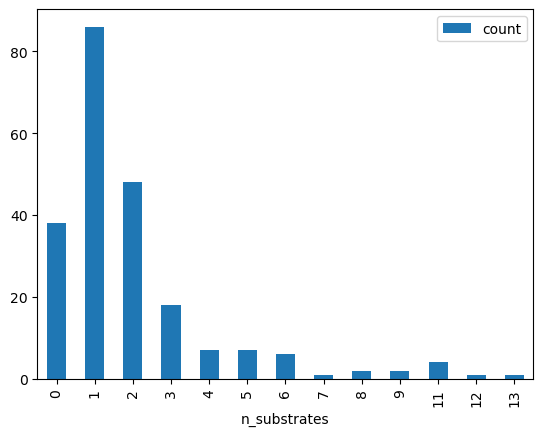

In [250]:
transport_system_number_of_substrates.value_counts().reset_index(name="count").rename(
    columns={"index": "n_substrates"}
).sort_values("n_substrates").plot.bar(x="n_substrates", y="count")

What are the transport systems with a large number of substrates?

In [252]:
transport_system_number_of_substrates[transport_system_number_of_substrates > 12]

2.A.1.2.19    13
dtype: int64

The transport system with 13 substrates is the "Multidrug resistance exporter" (MdfA). The large number of substrates also comes from well-known drugs that the transporters are known to carry.

In [253]:
transport_system_number_of_substrates[transport_system_number_of_substrates == 12]

2.A.1.2.62    12
dtype: int64

The 12 substrate transporter is also a multidrug resistance pump called PunC.

In [254]:
transport_system_number_of_substrates[transport_system_number_of_substrates == 7]

2.A.1.5.1    7
dtype: int64

The transporter with 7 substrates is lacY, a proton-sugar symporter

### Gene ontology

In [126]:
from subpred.ontology import GeneOntology, GO_FILE, add_go_ancestors, EVIDENCE_CODE_TO_DESCRIPTION

go_owl = GeneOntology(GO_FILE)

In [261]:
df_go = load_df("go")
df_go_ecoli = df_go[df_go.Uniprot.isin(df_uniprot_ecoli.index)].reset_index(drop=True)
df_go_ecoli_mf = df_go_ecoli[(df_go_ecoli.qualifier == "enables") & (df_go_ecoli.aspect == "F")].reset_index(drop=True).drop(["qualifier", "aspect"], axis=1)
df_go_ecoli_mf = df_go_ecoli_mf.sort_values(df_go_ecoli_mf.columns.tolist())
df_go_ecoli_mf = add_go_ancestors(df_go_ecoli_mf, go_owl)
df_go_ecoli_mf = df_go_ecoli_mf.assign(go_term = df_go_ecoli_mf.go_id.transform(go_owl.get_label))
df_go_ecoli_mf = df_go_ecoli_mf.assign(evidence_category = df_go_ecoli_mf.evidence_code.map(EVIDENCE_CODE_TO_DESCRIPTION))
df_go_ecoli_mf

,Uniprot,evidence_code,go_id,go_term,evidence_category
0,A0A0A6YVN8,IEA,GO:0043167,ion binding,electronic_annotation
1,A0A0A6YVN8,IEA,GO:0043169,cation binding,electronic_annotation
2,A0A0A6YVN8,IEA,GO:0003674,molecular_function,electronic_annotation
3,A0A0A6YVN8,IEA,GO:0046872,metal ion binding,electronic_annotation
4,A0A0A6YVN8,IEA,GO:0005488,binding,electronic_annotation
...,...,...,...,...,...
76606,Q93K97,IEA,GO:0046872,metal ion binding,electronic_annotation
76607,Q93K97,IEA,GO:0005488,binding,electronic_annotation
76608,Q93K97,IDA,GO:0047631,ADP-ribose diphosphatase activity,experimental_evidence
76609,Q93K97,IEA,GO:0016462,pyrophosphatase activity,electronic_annotation


In [262]:
df_go_ecoli_mf_secondary = df_go_ecoli_mf[df_go_ecoli_mf.go_term == "secondary active transmembrane transporter activity"]
df_go_ecoli_mf_secondary.evidence_category.value_counts()

electronic_annotation        96
experimental_evidence        80
phylogenetically_inferred    44
computational_analysis        8
Name: evidence_category, dtype: int64

In [266]:
secondary_active_transporters_go = set(df_go_ecoli_mf[df_go_ecoli_mf.go_term == "secondary active transmembrane transporter activity"].Uniprot.unique())
len(secondary_active_transporters_go)

127

In [267]:
secondary_active_transporters_go = set(df_go_ecoli_mf[df_go_ecoli_mf.go_term == "transmembrane transporter activity"].Uniprot.unique())
len(secondary_active_transporters_go)

480

Only half as many! Including all qualifiers did not change that. What is the distribution of proteins among the child terms of transmembrane transporter activity?

In [270]:
direct_child_terms = {go_owl.get_label(go_id) for go_id in go_owl.get_children(go_owl.get_identifier("transmembrane transporter activity"))}
direct_child_terms_count = {child_term : df_go_ecoli_mf[df_go_ecoli_mf.go_term == child_term].Uniprot.unique().shape[0] for child_term in direct_child_terms}

{'ferric triacetylfusarinine C transmembrane transporter activity': 0,
 'xenobiotic transmembrane transporter activity': 27,
 'efflux transmembrane transporter activity': 25,
 'toxin transmembrane transporter activity': 2,
 'carbon dioxide transmembrane transporter activity': 0,
 'bicyclomycin transmembrane transporter activity': 0,
 'alkane transmembrane transporter activity': 0,
 'auxin transmembrane transporter activity': 0,
 'nucleobase transmembrane transporter activity': 12,
 'salt transmembrane transporter activity': 1,
 'modified amino acid transmembrane transporter activity': 13,
 'organic hydroxy compound transmembrane transporter activity': 16,
 'amine transmembrane transporter activity': 2,
 'poly-beta-1,6-N-acetyl-D-glucosamine transmembrane transporter activity': 1,
 'sulfur compound transmembrane transporter activity': 16,
 'polyamine transmembrane transporter activity': 12,
 'organomercurial transmembrane transporter activity': 0,
 'chlorophyll catabolite transmembrane 

In [271]:
# TODO vergleich mit TCDB. Warum soviel weniger? schnittmenge, go terms der tcdb-transporter

In [ ]:
# filtere transmembrane transporter activity nach 2.A, siehe verteilung auf child go terms. 